# Assignment6-R-Tree-based

# Assignment 6 - Tree-based approaches
# 1.1 Overview of the steps
1. Load the data and get an overview of the data
2. Learn and assess Classification Trees
3. Learn and assess Regression Trees
4. Learn and assess Regression Bagging (Trees) and Random Forests
5. Learn and assess Regression Boosting (Trees)
# 1.2 Steps in detail
## 1.2.1 Load the data and get an overview of the data
Load the data file `Carseats.csv`.
In these data, the `Sales` of carseats is a quantitative response variable. Get an overview of the variables [here](https://rdrr.io/cran/ISLR/man/Carseats.html).

In [1]:
import numpy.random
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib notebook
import scipy
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree as sklearn_plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor


default_figsize=(8, 6)
default_alpha = .05
image_format = 'png'

/home/bogdan/lnu/4dv660/ml-practice/venv/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
carseats_df = pd.read_csv('../ISLR/data/Carseats.csv', index_col=[0])

Display the number of predictors (including the response `Sales`) and their names:

In [3]:
print(len(carseats_df.columns))
print(carseats_df.columns)

11
Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [4]:
carseats_df.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


Display the number of data points:

In [5]:
len(carseats_df)

400

Display the data in a table

> Top 20 rows are shown.

In [6]:
n = 20
display(carseats_df.info(verbose=True))
display(carseats_df.head(n))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


None

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


Compute the pairwise correlation of the predictors in the data set.

In [7]:
def corrmat(df, render=display):
    """Does not do symbol-coded chart."""
    def pearsonr_pval(x,y):
        return scipy.stats.pearsonr(x,y)[1]
    render(Markdown('Pearson:'))
    corr = df.corr(method='pearson')
    render(corr)
    render(Markdown('P values:'))
    render(df.corr(method=pearsonr_pval))
    render(Markdown('Pearson (chart):'))
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.heatmap(corr.round(2), ax=ax, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
    plt.show()

> In R, given `Carseats` is a 2-dimensional list, `Carseats[,-(10:11)]` and `Carseats[,-7]` returns the same 2-dimensional list without 6th, 10th and 11th column. Indexing in R is one-based, indexing in Python is zero-based.

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')


Pearson:

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


P values:

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000e+00,2.009398e-01,0.002310,4.377677e-08,3.139816e-01,7.618187e-21,0.000003,0.299944
CompPrice,2.009398e-01,1.000000e+00,0.107257,6.294282e-01,5.842996e-02,4.502047e-38,0.045118,0.615355
Income,2.309670e-03,1.072571e-01,1.000000,2.391048e-01,8.752060e-01,2.579181e-01,0.925816,0.256598
Advertising,4.377677e-08,6.294282e-01,0.239105,1.000000e+00,6.904797e-08,3.743306e-01,0.927600,0.502875
Population,3.139816e-01,5.842996e-02,0.875206,6.904797e-08,1.000000e+00,8.086862e-01,0.394778,0.033425
Price,7.618187e-21,4.502047e-38,0.257918,3.743306e-01,8.086862e-01,1.000000e+00,0.041103,0.814826
Age,2.788950e-06,4.511817e-02,0.925816,9.275997e-01,3.947781e-01,4.110296e-02,1.000000,0.897076
Education,2.999442e-01,6.153555e-01,0.256598,5.028753e-01,3.342466e-02,8.148260e-01,0.897076,1.000000


Pearson (chart):

<IPython.core.display.Javascript object>


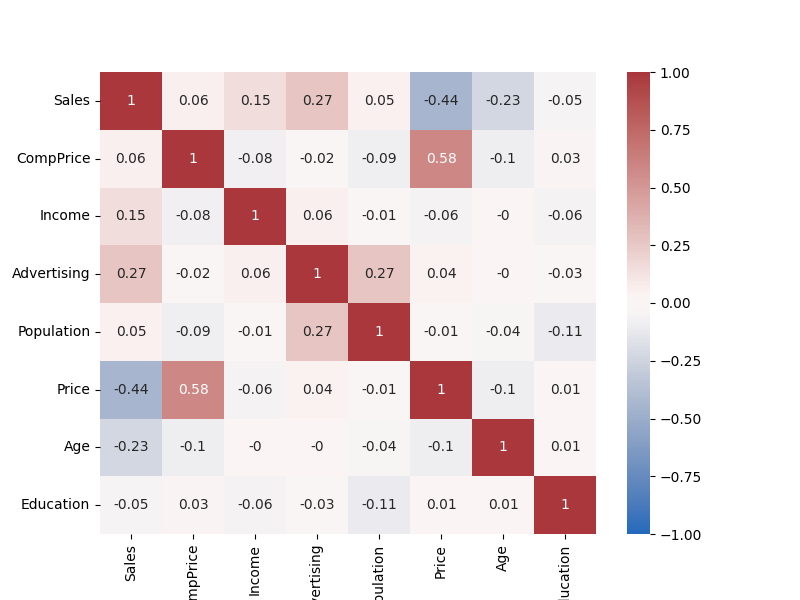

In [8]:
carseats_quantitative_df = carseats_df.drop(carseats_df.columns[[6, 9, 10]], axis=1)
print(carseats_quantitative_df.columns)
corrmat(carseats_quantitative_df)

Plot the response to its most correlated predictor.

In [9]:
def fit_lr(x, y):
    X = sm.add_constant(x)
    return sm.OLS(y, X).fit()

def plot(x, y, xlab, ylab, mod_fit=None, alpha=default_alpha):
    fig, ax = plt.subplots(figsize=default_figsize)
    ax.plot(x, y, 'yo')
    if mod_fit:
        X = sm.add_constant(x)
        regr = mod_fit.predict(X)
        ax.plot(x, regr, 'k')
        prediction = mod_fit.get_prediction(X)
        frame = prediction.summary_frame(alpha=alpha)
        zipped = pd.concat([x, frame.mean_ci_lower, frame.mean_ci_upper], axis=1)
        zipped.sort_values(x.name, inplace=True)
        ax.fill_between(zipped[x.name], zipped[frame.mean_ci_lower.name], zipped[frame.mean_ci_upper.name], color='k', alpha=.3)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.show()

def format_pearsonr(values):
    return f'R = {values[0]}, p < {values[1]}'

def fit_lr_plot_full(x, y, xlab=None, ylab=None):
    mod_fit = fit_lr(x, y)
    print(format_pearsonr(scipy.stats.pearsonr(x, y)))
    plot(x, y, xlab or getattr(x, 'name', 'x'), getattr(y, 'name', 'y'), mod_fit)
    return mod_fit

R = -0.4449507278465725, p < 7.61818701191294e-21


<IPython.core.display.Javascript object>


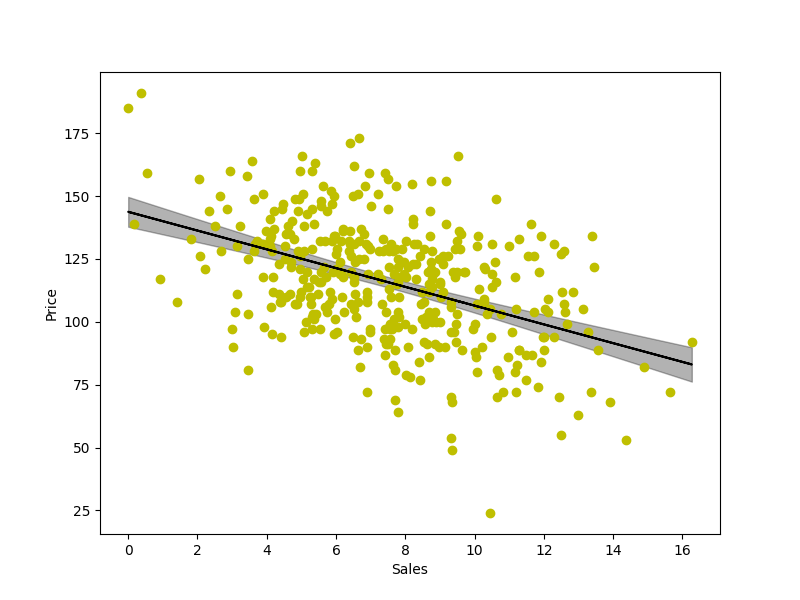

In [10]:
fit_lr_plot_full(carseats_df['Sales'], carseats_df['Price'])

### Interpret the results.

#### Correlation matrix.

The absolute value of every pairwise correlation is below 0.6, which means that there is no strong correlation between any 2 analysed variables.

There is a correlation of 0.58 between `Price` and `CompPrice`. It is within expectations since the price of competitors is connected to the price of a specific store.

Slightly weaker correlation is between `Price` and `Sales`. The correlation is -0.44, which partially conforms to the basic economic laws: the lower the price, the more sales are to be made.

There are also 2 correlations with absolute value below 0.3:
- 0.27 between `Advertising` and `Sales`. It is within expectations because sales are somewhat affected by advertisement;
- -0.23 between `Age` and `Sales`. An interesting observation: younger people seems to buy more carseats, likely, due to the fact of them bringing up children.

#### Scatter plot.

The earlier discussed correlation between `Sales` and `Price` is entirely confirmed by the chart itself: the linear regression slope is also negative. Since the Pearson correlation coefficient is not large, the slope is not very steep.

## 1.2.2 Learn and assess Classification Trees

Predict that the `Sales` is high using the predictors.

In [11]:
carseats_backup_df = carseats_df.copy()

In [12]:
high = carseats_backup_df['Sales'].transform(lambda x: 'No' if x <= 8 else 'Yes')
carseats_df = carseats_backup_df.copy()
carseats_df['High'] = high
print(carseats_df.columns)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'High'],
      dtype='object')


### We now use the `tree()` function to fit a classification tree in order to predict `High` using all variables but `Sales`.

In [13]:
random_state = None


def reset_random(seed=1):
    global random_state
    random_state = np.random.RandomState(1)

def sample(df, n=None, replace=False):
    return df.sample(n if n is not None else len(df), replace=replace, random_state=random_state)

In [14]:
categorical_columns = ['ShelveLoc', 'Urban', 'US']

tree_df = carseats_df.copy()
one_hot_df = pd.get_dummies(carseats_df[categorical_columns])
tree_df[one_hot_df.columns] = one_hot_df
high_columns = list(c for c in tree_df.columns if c.startswith('High'))
tree_df.drop(categorical_columns, axis=1, inplace=True)

> One-hot encoding is needed before using `DecisionTreeClassifier`.

In [15]:
def split_carseats_tree_x_y(df):
    return df.drop([*high_columns, 'Sales'], axis=1), df[high_columns]

def fit_class_tree(x_df, y_df, **kwargs):
    return DecisionTreeClassifier(splitter='best', criterion='gini', random_state=random_state, **kwargs).fit(x_df, y_df)

In [16]:
def print_tree(tree, x_df, y_df, df_type=None):
    print(type(tree).__name__ + ':')
    print('Variables actually used in tree construction:', tree.feature_names_in_)
    n_leaves = tree.get_n_leaves()
    print('Number of terminal nodes:', n_leaves)
    predicted = tree.predict(x_df)
    degrees_of_freedom = len(x_df) - n_leaves
    print()
    if df_type:
        print(f'Calculating metrics for "{df_type}" dataset:')
    if isinstance(tree, DecisionTreeClassifier):
        imprecision_mask = ~(predicted == y_df.squeeze())
        residual_sum_of_squares = np.square(imprecision_mask.astype(int)).to_numpy().sum()
    else:
        residual_sum_of_squares, residual_squares = calculate_ssr(y_df, predicted)
    print(f'Residual mean deviance: {residual_sum_of_squares / degrees_of_freedom} = {residual_sum_of_squares} / {degrees_of_freedom}')
    if isinstance(tree, DecisionTreeClassifier):
        missclassified_count = predicted[imprecision_mask].shape[0]
        print(f'Misclassification error rate: {missclassified_count / len(x_df)} = {missclassified_count} / {len(x_df)}')
    else:
        print('Distribution of residuals:\n', residual_squares.describe())

In [17]:
reset_random(0)
x_df, y_df = split_carseats_tree_x_y(tree_df)
tree_carseats = fit_class_tree(x_df, y_df)
print_tree(tree_carseats, x_df, y_df)

DecisionTreeClassifier:
Variables actually used in tree construction: ['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'Age' 'Education'
 'ShelveLoc_Bad' 'ShelveLoc_Good' 'ShelveLoc_Medium' 'Urban_No'
 'Urban_Yes' 'US_No' 'US_Yes']
Number of terminal nodes: 61

Residual mean deviance: 0.0 = 0 / 339
Misclassification error rate: 0.0 = 0 / 400


> There are more variables, than in `R` counterpart due to one-hot encoder.

> Due to difference in implementation there are much terminal nodes (leaves) as well as 100% precision. I compared documentation between R's `tree` and Python's `DecisionTreeClassifier`, but couldn't get the same result as it was in previous assignments.

> One-hot encoding could be the root cause of all the differences between R and Python implementations since it is unknown, how categorical data is handled by R.

In [18]:
def to_row_hash_array(arr, columns=None):
    columns = arr.columns if isinstance(arr, pd.DataFrame) else columns if columns is not None and len(columns) > 0 else np.array(range(arr.shape[1] if hasattr(arr, 'shape') else len(arr[0])))
    return [';'.join('{c}:{v}'.format(c=columns[i], v=v) for i, v in enumerate(row)) for row in arr]

In [19]:
def plot_tree(tree, x_df, y_df, filename_no_ext):
    fig, ax = plt.subplots(figsize=default_figsize)
    class_full_names = to_row_hash_array(y_df.drop_duplicates().to_numpy(), y_df.columns)
    sklearn_plot_tree(tree, ax=ax, class_names=class_full_names, feature_names=tree.feature_names_in_, filled=True)
    fig.show()
    filename = f'{filename_no_ext}.{image_format}'
    fig.savefig(filename, dpi=1000, format=image_format)
    display(Markdown(f'#### For better resolution please, see the file `{filename}`'))

<IPython.core.display.Javascript object>


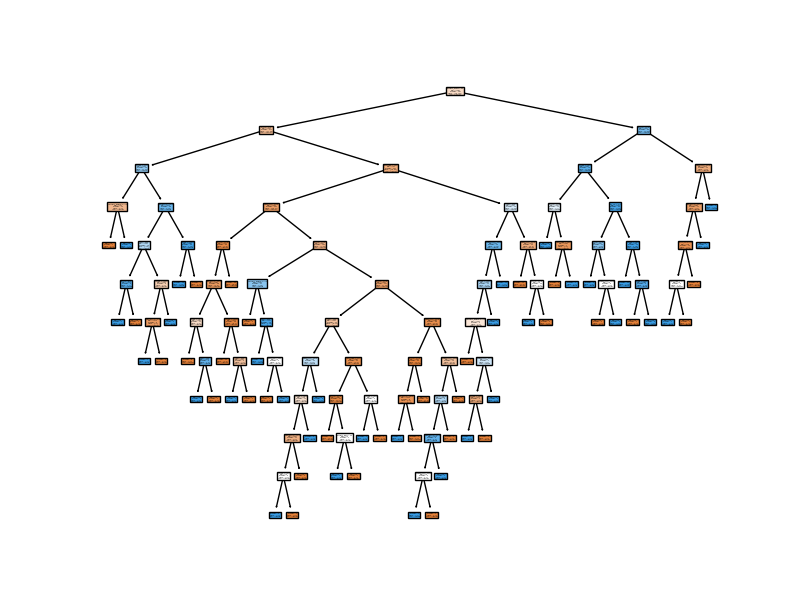

#### For better resolution please, see the file `tree_classifier.png`

In [20]:
plot_tree(tree_carseats, x_df, y_df, 'tree_classifier')

> The assignment has 2 visualisations of the tree:
> - brief line-based, without much information;
> - detailed, colorful, nice and bottom-aligned.
>
> I have only one visualisation because I am totally satisfied with it.
> The only thing that is missing in my visualisation is alignment of leaf nodes by bottom, but I don't see the point in it.
>
> Also, I checked other visualizations and didn't find anything better there. Besides, my tree is more than 2 times larger than the assignment's tree and tree visualisation is a known problem in InfoVis.

### Interpret the results.

The numbers tell that the model is perfect: no errors (100% precision, sum of squared residuals is 0). Perhaps, one of the reasons is the larger amount of leaf nodes (61 vs 27 from the assignment).

But I feel that the model is just overfit because:
- the metrics were calculated using training data;
- according to the dataset description, it is an artificial datasource. This might mean that the data is made intentionally "easy-to-learn" for machines.

In order to properly evaluate the performance of a classification tree on these data, we must estimate the test error rather than simply computing the training error. We split the observations into a training set and a test set, build the tree using the training set, and evaluate its performance on the test data.

Training (size 200) and testing (size 200) subsets are to be formed by random sampling (without repetition) from the initial dataset (size 400).

In [21]:
def crosstable(levels, actual, predicted):
    d = {}
    for level in levels:
        d[level] = {}
    for row in d.values():
        for level in d.keys():
            row[level] = 0
    for i in range(0, len(actual)):
        d[actual[i]][predicted[i]] += 1
    return d

def crosstable_df(levels, actual, predicted):
    d = crosstable(levels, actual, predicted)
    df = pd.DataFrame(d)
    df.index.set_names('Actual', inplace=True)
    df.columns.set_names('Predicted', inplace=True)
    return df

def accuracy(ct_df):
    return np.trace(ct_df) / ct_df.to_numpy().sum()

In [22]:
reset_random(2022)
train_df = sample(tree_df, 200)
test_df = tree_df.loc[tree_df.index.difference(train_df.index)]
train_x_df, train_y_df = split_carseats_tree_x_y(train_df)
tree_carseats = fit_class_tree(train_x_df, train_y_df)
test_x_df, test_y_df = split_carseats_tree_x_y(test_df)
test_y = test_y_df.to_numpy()
tree_prediction = tree_carseats.predict(test_x_df)
y_levels, ct_actual, ct_predicted = (to_row_hash_array(v, test_y_df.columns) for v in (test_y_df.drop_duplicates().to_numpy(), test_y, tree_prediction.reshape((-1, 1))))
ct_df = crosstable_df(y_levels, ct_actual, ct_predicted)
display(ct_df)
print_tree(tree_carseats, test_x_df, test_y_df, 'test')

Predicted,High:Yes,High:No
Actual,,
High:Yes,62,35
High:No,21,82


DecisionTreeClassifier:
Variables actually used in tree construction: ['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'Age' 'Education'
 'ShelveLoc_Bad' 'ShelveLoc_Good' 'ShelveLoc_Medium' 'Urban_No'
 'Urban_Yes' 'US_No' 'US_Yes']
Number of terminal nodes: 36

Calculating metrics for "test" dataset:
Residual mean deviance: 0.34146341463414637 = 56 / 164
Misclassification error rate: 0.28 = 56 / 200


### Interpret the results

The updated tree model looks more realistic. The train-test split of 200-to-200 produced a model with precision of 72%.

The precision is not very high, but it also means, that this model is not overfit, like the previous model.

This tree model had more issues correctly classifying `High:Yes` category - 62 correct and 35 incorrect classifications (97 in total) as opposed to `High:No` with 82 correct and 21 incorrect classifications (103 in total). The data subset has 97 `High:Yes` and 103 `High:No` entries, so the dataset is almost perfectly balanced.

### Pruning the tree might lead to improved results.

The function `cv_tree()` performs cross-validation in order to determine the optimal level of tree complexity; cost complexity pruning is used in order to select a sequence of trees for consideration. We use the classification error rate to guide the cross-validation and pruning process.
Prune the tree using cross validation.

In [23]:
def cv_tree(df, sklearn_tree_factory, k, split_x_y, calculate_metric, metric_name, random_state=None):
    """Performs minimal cost complexity tree post-pruning."""
    # Simple k-fold cross validation is used since no other requirements received.
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    results = pd.DataFrame({
        'K-Fold': pd.Series(dtype=int),
        'Alpha': pd.Series(dtype=float),
        'Tree': pd.Series(dtype=object),
        metric_name: pd.Series(dtype=float),
    }, index=pd.Series(dtype=int))
    for i, (train_index, test_index) in enumerate(kf.split(df)):
        x_df, y_df = split_x_y(df.iloc[train_index])
        x_test_df, y_test_df = split_x_y(df.iloc[test_index])
        clf = sklearn_tree_factory(random_state=random_state)
        path = clf.cost_complexity_pruning_path(x_df, y_df)

        for ccp_alpha in path.ccp_alphas:
            clf = sklearn_tree_factory(random_state=random_state, ccp_alpha=ccp_alpha)
            clf.fit(x_df, y_df)
            results.loc[len(results.index)] = [i + 1, ccp_alpha, clf, calculate_metric(y_test_df, clf.predict(x_test_df))]
    return results


In [24]:
def classification_error_rate(y_actual, y_predicted):
    return accuracy_score(y_actual, y_predicted)

In [25]:
reset_random(1004)

cv_results = cv_tree(tree_df, DecisionTreeClassifier, 10, split_carseats_tree_x_y, classification_error_rate, 'Accuracy', random_state)
cv_results.insert(2, 'N-Leaves', cv_results['Tree'].apply(lambda clf: clf.get_n_leaves()).astype(int))

In [26]:
display(Markdown('#### Sorted by Accuracy:'), cv_results.sort_values(['Accuracy', 'Alpha', 'K-Fold'], axis=0, ascending=False))
display(Markdown('#### Sorted by Alpha:'), cv_results.sort_values(['Alpha', 'Accuracy', 'K-Fold'], axis=0, ascending=False))

#### Sorted by Accuracy:

,K-Fold,Alpha,N-Leaves,Tree,Accuracy
3,1,0.002778,52,DecisionTreeClassifier(ccp_alpha=0.00277777777...,0.875
1,1,0.002500,56,DecisionTreeClassifier(ccp_alpha=0.00250000000...,0.875
0,1,0.000000,56,DecisionTreeClassifier(random_state=RandomStat...,0.875
19,1,0.007836,18,DecisionTreeClassifier(ccp_alpha=0.00783559837...,0.850
257,8,0.006677,18,DecisionTreeClassifier(ccp_alpha=0.00667735042...,0.850
...,...,...,...,...,...
75,3,0.004762,28,DecisionTreeClassifier(ccp_alpha=0.00476190476...,0.575
74,3,0.004735,29,DecisionTreeClassifier(ccp_alpha=0.00473484848...,0.575
93,3,0.066122,1,DecisionTreeClassifier(ccp_alpha=0.06612150747...,0.550
196,6,0.076716,1,DecisionTreeClassifier(ccp_alpha=0.07671560183...,0.525


#### Sorted by Alpha:

,K-Fold,Alpha,N-Leaves,Tree,Accuracy
196,6,0.076716,1,DecisionTreeClassifier(ccp_alpha=0.07671560183...,0.525
60,2,0.076220,1,DecisionTreeClassifier(ccp_alpha=0.07621999621...,0.500
269,8,0.074425,1,DecisionTreeClassifier(ccp_alpha=0.07442528066...,0.575
160,5,0.074386,1,DecisionTreeClassifier(ccp_alpha=0.07438637673...,0.650
32,1,0.073405,1,DecisionTreeClassifier(ccp_alpha=0.07340501792...,0.700
...,...,...,...,...,...
161,6,0.000000,59,DecisionTreeClassifier(random_state=RandomStat...,0.725
270,9,0.000000,68,DecisionTreeClassifier(random_state=RandomStat...,0.675
61,3,0.000000,57,DecisionTreeClassifier(random_state=RandomStat...,0.675
197,7,0.000000,56,DecisionTreeClassifier(random_state=RandomStat...,0.650


## Interpret the results.

The accuracy of the model went up from 72% to 87%. However, the highest result was obtained for first cross-validation iteration, small $\alpha$ value and large amount of leaves. The current amount of leaves is much more (52 vs 36).

Perhaps, the model is overfit. Since the top-3 results are from the first cross-validation iteration, possible overfitting can be mitigated by trying to use other cross-validation dataset splitting approaches (shuffle split, grouped and stratified k-fold, etc.).

It can also be seen that the next highest accuracy is 85% with 18 leaves, which seems a better variant, than a large tree.

**Conclusion**: preliminary analysis shows that the node with 18 leaves and 85% accuracy might be an optimal solution.

## Consider plotting the error rate as a function of tree size and $\alpha$. What is the tree with the right size?

In [27]:
def plot_lines(df, x_column, y_columns):
    fig, axs = plt.subplots(nrows=len(y_columns), ncols=1, figsize=default_figsize)
    df = df.sort_values([x_column, *y_columns])
    x = df[x_column]
    for column, ax in zip(y_columns, axs):
        y = df[column]
        ax.plot(x, y, color='blue', marker='o')
        ax.set_xlabel(x.name)
        ax.set_ylabel(y.name)
        ax.grid(True)
    fig.show()

<IPython.core.display.Javascript object>


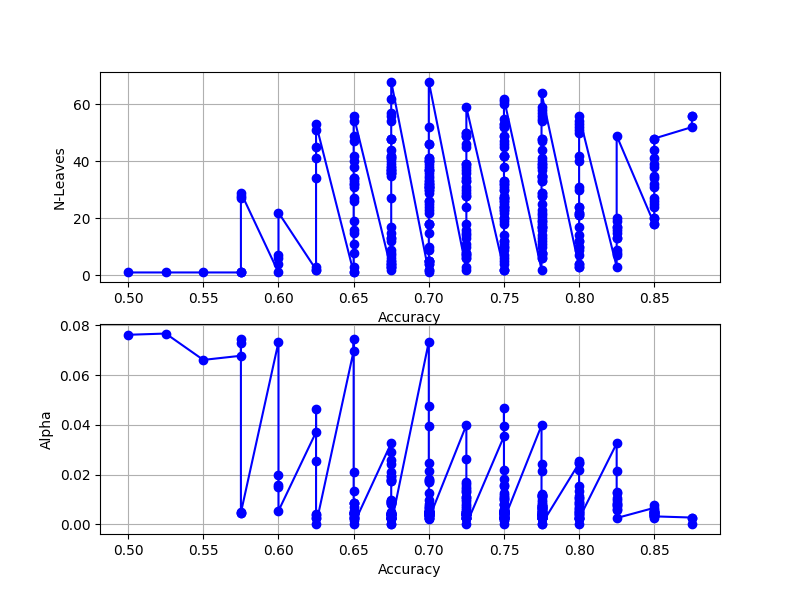

In [28]:
plot_lines(cv_results, 'Accuracy', ['N-Leaves', 'Alpha'])

In [29]:
cv_best_results = cv_results[cv_results.apply(lambda row: 0.825 < row['Accuracy'] < 0.875 and row['N-Leaves'] < 20 and row['Alpha'] < 0.01, axis=1)].sort_values('Accuracy', ascending=False)
display(cv_best_results)
display(Markdown(f'#### Found {cv_best_results.shape[0]} best models out of {cv_results.shape[0]} constructed during post-pruning using K-fold cross validation.'))

,K-Fold,Alpha,N-Leaves,Tree,Accuracy
19,1,0.007836,18,DecisionTreeClassifier(ccp_alpha=0.00783559837...,0.85
257,8,0.006677,18,DecisionTreeClassifier(ccp_alpha=0.00667735042...,0.85


#### Found 2 best models out of 343 constructed during post-pruning using K-fold cross validation.

## Interpret the results

The charts confirm the preliminary analysis: the best models are with reasonably small number of leaves (18) and relatively small $\alpha$ (less than 0.01).

After applying filtering there exist 2 models (out of 343 constructed), which satisfy the criteria.

## Now we are ready to prune the tree according to our findings and plot the pruned tree.

In [30]:
for key, row in cv_best_results.iterrows():
    display(Markdown(f'#### Test results of the tree #`{key}`:'))
    tree = row['Tree']
    tree_prediction = tree.predict(test_x_df)
    ct_df = crosstable_df(y_levels, ct_actual, to_row_hash_array(tree_prediction.reshape((-1, 1)), test_y_df.columns))
    display(ct_df)
    display(Markdown('##### Accuracy: ' + str(accuracy(ct_df))))

#### Test results of the tree #`19`:

Predicted,High:Yes,High:No
Actual,,
High:Yes,73,14
High:No,10,103


##### Accuracy: 0.88

#### Test results of the tree #`257`:

Predicted,High:Yes,High:No
Actual,,
High:Yes,68,11
High:No,15,106


##### Accuracy: 0.87

In [31]:
cv_best_tree = cv_results.loc[19]
cv_best_tree

K-Fold                                                      1
Alpha                                                0.007836
N-Leaves                                                   18
Tree        DecisionTreeClassifier(ccp_alpha=0.00783559837...
Accuracy                                                 0.85
Name: 19, dtype: object

In [32]:
pruned_tree = fit_class_tree(train_x_df, train_y_df, max_leaf_nodes=cv_best_tree['N-Leaves'])

> Due to differences in APIs between R's `tree` and Python's `sklearn.tree`, there is a need to construct a new tree, rather than prune existed. Python API doesn't allow to prune an existing tree (or, at least, I didn't find such capability).
> Also, during cross-validation all trees were constructed explicitly and memoized. After filtering an already pretrained tree can be obtained.

> Above you can see the tree, as specified in the assignment, with limitations of size.

### How well does this pruned tree perform on the test data set?

DecisionTreeClassifier:
Variables actually used in tree construction: ['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'Age' 'Education'
 'ShelveLoc_Bad' 'ShelveLoc_Good' 'ShelveLoc_Medium' 'Urban_No'
 'Urban_Yes' 'US_No' 'US_Yes']
Number of terminal nodes: 18

Calculating metrics for "test" dataset:
Residual mean deviance: 0.23076923076923078 = 42 / 182
Misclassification error rate: 0.21 = 42 / 200


Predicted,High:Yes,High:No
Actual,,
High:Yes,63,22
High:No,20,95


<IPython.core.display.Javascript object>


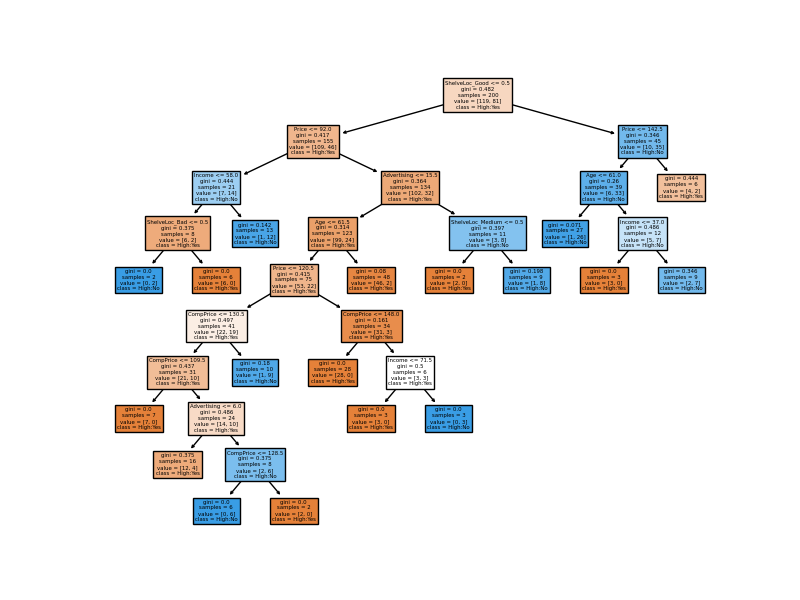

#### For better resolution please, see the file `tree_classifier_best.png`

In [33]:
tree_prediction = pruned_tree.predict(test_x_df)
ct_df = crosstable_df(y_levels, ct_actual, to_row_hash_array(tree_prediction.reshape((-1, 1)), test_y_df.columns))
print_tree(pruned_tree, test_x_df, test_y_df, 'test')
display(ct_df)
plot_tree(pruned_tree, test_x_df, test_y_df, 'tree_classifier_best')

The precision of the pruned tree is 79%. It is worse, than the model, obtained during cross-validation (87 - 88% precision), but the model, produced during cross-validation has a higher likelihood of being overfit since it was trained on a larger subset of the initial dataset.

**Conclusion:** Newly trained tree with the limit for number of leaves is better than the tree from cross-validation.

### Let's try constructing a tree with higher amount of leaves.

In [34]:
# max leaves is multiplied by 3, since in the assignment the best had 6, while the attempt to construct another tree had 18 max leaves.
tmp_tree = fit_class_tree(train_x_df, train_y_df, max_leaf_nodes=cv_best_tree['N-Leaves'] * 3)
print_tree(tmp_tree, test_x_df, test_y_df, 'test')

DecisionTreeClassifier:
Variables actually used in tree construction: ['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'Age' 'Education'
 'ShelveLoc_Bad' 'ShelveLoc_Good' 'ShelveLoc_Medium' 'Urban_No'
 'Urban_Yes' 'US_No' 'US_Yes']
Number of terminal nodes: 36

Calculating metrics for "test" dataset:
Residual mean deviance: 0.31097560975609756 = 51 / 164
Misclassification error rate: 0.255 = 51 / 200


## Interpret the results.

The model, constructed before cross-validation with post-pruning, had accuracy of 72%. The pruned model has accuracy of 79%.

When the amount of leaves is increased, the accuracy drops to 74.5%. This confirms the usefulness of tree pruning.

## 1.2.3 Learn and assess Regression Trees

Recall the 'Boston' data set from Assignments 2 and 3. Check the details of this data set and load it.

In [35]:
boston_df = pd.read_csv('../ISLR/data/Boston.csv', index_col=0)

### Create a training set, and fit the tree to the training data.

In [36]:
boston_y_labels = 'medv'

def split_boston_tree_x_y(df):
    return df.drop(boston_y_labels, axis=1), df[boston_y_labels]

def fit_regr_tree(x_df, y_df, **kwargs):
    return DecisionTreeRegressor(splitter='best', random_state=random_state, **kwargs).fit(x_df, y_df)

In [37]:
def calculate_ssr(actual_df, predicted):
    residual_squares = np.square(predicted - actual_df.squeeze())
    return residual_squares.to_numpy().sum(), residual_squares

In [38]:
reset_random(1)
train_df = sample(boston_df, boston_df.shape[0] // 2)
test_df = boston_df.loc[boston_df.index.difference(train_df.index)]
test_x_df, test_y_df = split_boston_tree_x_y(test_df)
train_x_df, train_y_df = split_boston_tree_x_y(train_df)
tree_boston = fit_regr_tree(train_x_df, train_y_df)
print_tree(tree_boston, train_x_df, train_y_df, 'training')

DecisionTreeRegressor:
Variables actually used in tree construction: ['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat']
Number of terminal nodes: 240

Calculating metrics for "training" dataset:
Residual mean deviance: 0.0 = 0.0 / 13
Distribution of residuals:
 count    253.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: medv, dtype: float64


In [39]:
def to_yes_no(value):
    return 'Yes' if value else 'No'

In [40]:
print('All variables used for tree construction?', to_yes_no(tree_boston.feature_names_in_.size == train_x_df.shape[1]))

All variables used for tree construction? Yes


### Plot the tree.

<IPython.core.display.Javascript object>


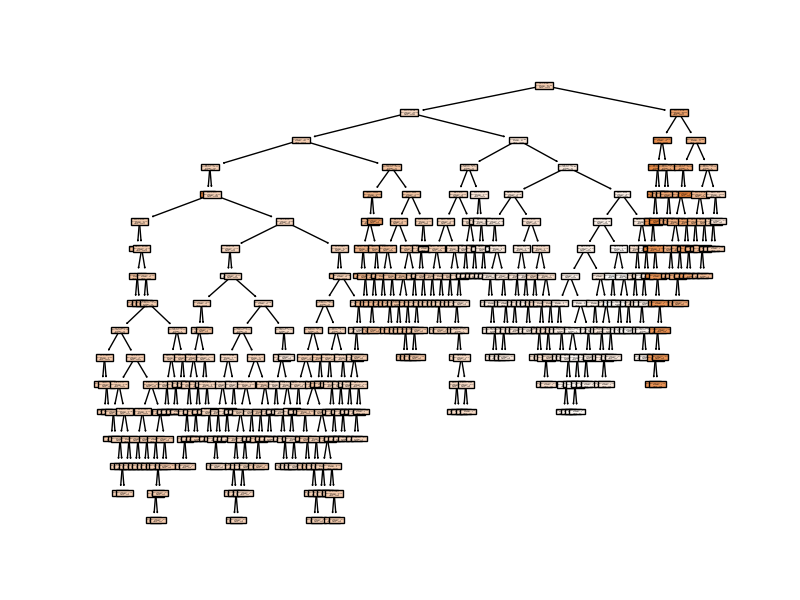

#### For better resolution please, see the file `tree_regressor.png`

In [41]:
plot_tree(tree_boston, test_x_df, test_y_df.to_frame(), 'tree_regressor')

In [42]:
print(f'Train dataset size is {train_df.shape[0]} vs number of leaves is {tree_boston.get_n_leaves()}.')
ssr = calculate_ssr(test_y_df, tree_boston.predict(test_x_df))[0]
print(f'Test data residual sum of squares: {ssr}, mean squared error: {ssr / train_df.shape[0]}')
print('Mean Y value (medv):', test_y_df.mean())

Train dataset size is 253 vs number of leaves is 240.
Test data residual sum of squares: 4932.039999999999, mean squared error: 19.494229249011855
Mean Y value (medv): 22.046640316205533


### Interpret the results

The constructed tree is unusable, it is overfit and extremely large.

The amount of leaves is almost the same as the size of the dataset, there are no errors when predicting training dataset, but huge SSR when predicting earlier unseen values.

If SSR is divided by the size of the dataset, the resulting value is slightly less than the mean of Y (`medv`).

In [43]:
reset_random(0)
cv_results = cv_tree(boston_df, DecisionTreeRegressor, 10, split_boston_tree_x_y, lambda actual, predicted: calculate_ssr(actual, predicted)[0], 'Deviance', random_state)
cv_results.insert(2, 'N-Leaves', cv_results['Tree'].apply(lambda clf: clf.get_n_leaves()).astype(int))

In [44]:
display(Markdown('#### Sorted by Deviance:'), cv_results.sort_values(['Deviance', 'Alpha', 'K-Fold'], axis=0, ascending=False))
display(Markdown('#### Sorted by Alpha:'), cv_results.sort_values(['Alpha', 'Deviance', 'K-Fold'], axis=0, ascending=False))

#### Sorted by Deviance:

,K-Fold,Alpha,N-Leaves,Tree,Deviance
818,2,36.692482,1,DecisionTreeRegressor(ccp_alpha=36.69248186246...,5346.486944
412,1,37.355132,1,DecisionTreeRegressor(ccp_alpha=37.35513194557...,4735.332710
1649,4,39.836861,1,DecisionTreeRegressor(ccp_alpha=39.83686055843...,4501.917125
2059,5,38.691240,1,DecisionTreeRegressor(ccp_alpha=38.69124034216...,4052.055034
3292,8,39.972839,2,DecisionTreeRegressor(ccp_alpha=39.97283910611...,3969.693961
...,...,...,...,...,...
1906,5,0.005861,171,DecisionTreeRegressor(ccp_alpha=0.005860805860...,356.968817
1672,5,0.000011,413,DecisionTreeRegressor(ccp_alpha=1.098901098900...,356.132500
1914,5,0.006806,164,DecisionTreeRegressor(ccp_alpha=0.006805860805...,348.586754
1918,5,0.007502,158,DecisionTreeRegressor(ccp_alpha=0.007501831501...,339.278528


#### Sorted by Alpha:

,K-Fold,Alpha,N-Leaves,Tree,Deviance
3292,8,39.972839,2,DecisionTreeRegressor(ccp_alpha=39.97283910611...,3969.693961
1649,4,39.836861,1,DecisionTreeRegressor(ccp_alpha=39.83686055843...,4501.917125
2459,6,39.791160,1,DecisionTreeRegressor(ccp_alpha=39.79116023317...,3446.545723
2878,7,39.697955,2,DecisionTreeRegressor(ccp_alpha=39.69795469877...,1944.407651
1230,3,38.764542,2,DecisionTreeRegressor(ccp_alpha=38.76454158871...,2203.043592
...,...,...,...,...,...
2460,7,0.000000,432,DecisionTreeRegressor(random_state=RandomState...,705.970000
2060,6,0.000000,422,DecisionTreeRegressor(random_state=RandomState...,620.010000
0,1,0.000000,430,DecisionTreeRegressor(random_state=RandomState...,579.220000
1650,5,0.000000,429,DecisionTreeRegressor(random_state=RandomState...,528.150000


<IPython.core.display.Javascript object>


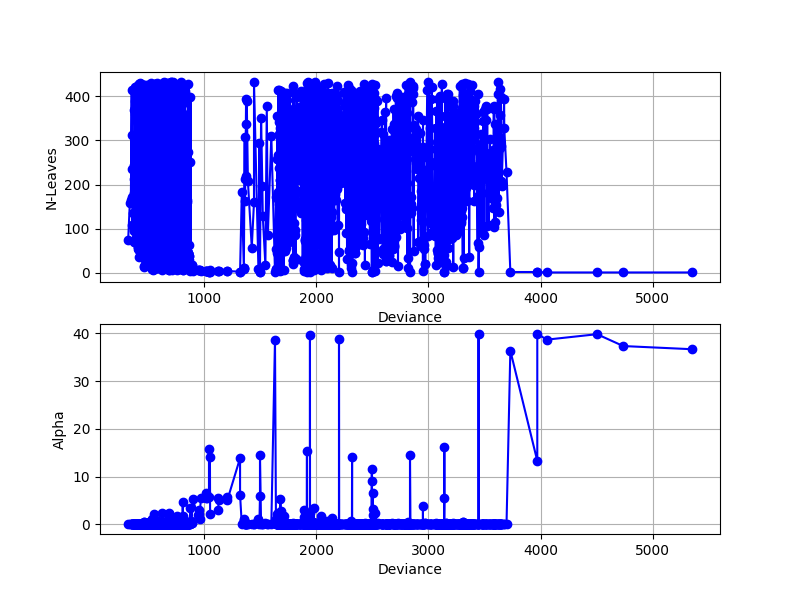

In [45]:
plot_lines(cv_results, 'Deviance', ['N-Leaves', 'Alpha'])
optimal_n_leaves = set()

<IPython.core.display.Javascript object>


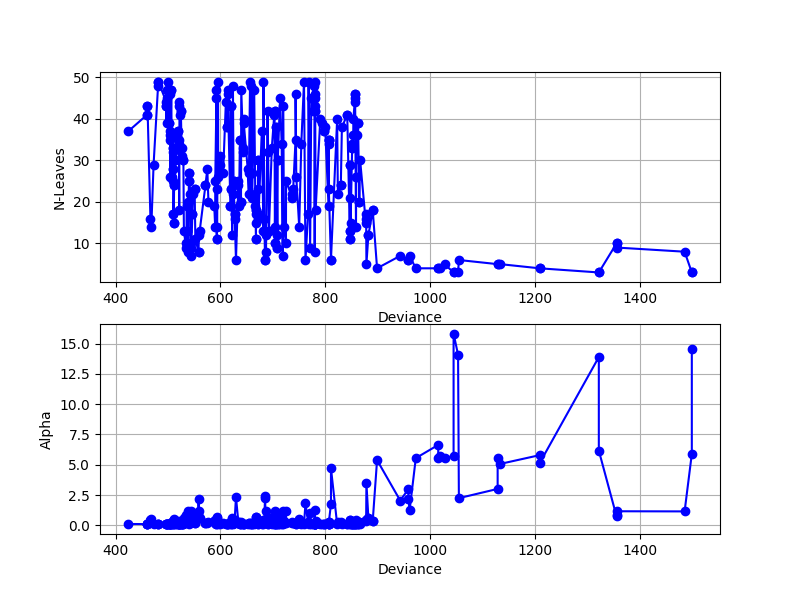

In [46]:
plot_lines(cv_results[cv_results.apply(lambda row: row['N-Leaves'] < 50 and row['Deviance'] < 1500, axis=1)], 'Deviance', ['N-Leaves', 'Alpha'])

<IPython.core.display.Javascript object>


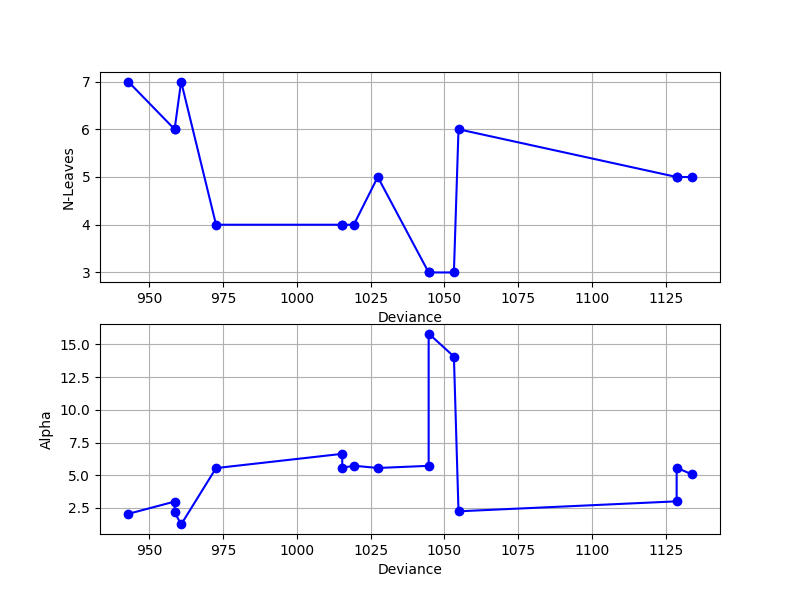

In [47]:
plot_lines(cv_results[cv_results.apply(lambda row: row['N-Leaves'] < 10 and 900 < row['Deviance'] < 1200, axis=1)], 'Deviance', ['N-Leaves', 'Alpha'])

In [48]:
optimal_n_leaves.add(7)

In [49]:
optimal_n_leaves

{7}

### Interpret the results

The charts were rather messy. Several iterations of filtering were required to narrow down search.

1 intervals of mean squared error (MSE) was analysed - `(900; 1200)`. The MSE here seems non-overfitting, and the charts showed small enough sizes of the trees. As a result, $7$ was selected as the optimal size of the tree.

### In keeping with the cross-validation results, use the best tree to make predictions on the test set

> Due to differences in the API between R and Python, we need to create an optimal tree first.

In [50]:
reset_random(0)
pruned_tree = fit_regr_tree(train_x_df, train_y_df, max_leaf_nodes=next(iter(optimal_n_leaves)))

In [51]:
def plot_confusion(actual, predicted, label_prefix):
    fig, ax = plt.subplots(figsize=default_figsize)
    x_min, x_max = np.min(predicted), np.max(predicted)
    y_min, y_max = np.min(actual), np.max(actual)
    ax.scatter(predicted, actual, color='blue', marker='o')
    ax.plot([x_min, x_max], [y_min, y_max], color='black')
    ax.set_xlabel(label_prefix + ': predicted')
    ax.set_ylabel(label_prefix + ': actual')
    fig.show()

### Pruned tree

DecisionTreeRegressor:
Variables actually used in tree construction: ['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat']
Number of terminal nodes: 7

Calculating metrics for "testing" dataset:
Residual mean deviance: 26.73501050176136 = 6576.812583433294 / 246
Distribution of residuals:
 count    253.000000
mean      25.995307
std       69.856074
min        0.000000
25%        1.003512
50%        5.561736
75%       21.143863
max      786.335069
Name: medv, dtype: float64


<IPython.core.display.Javascript object>


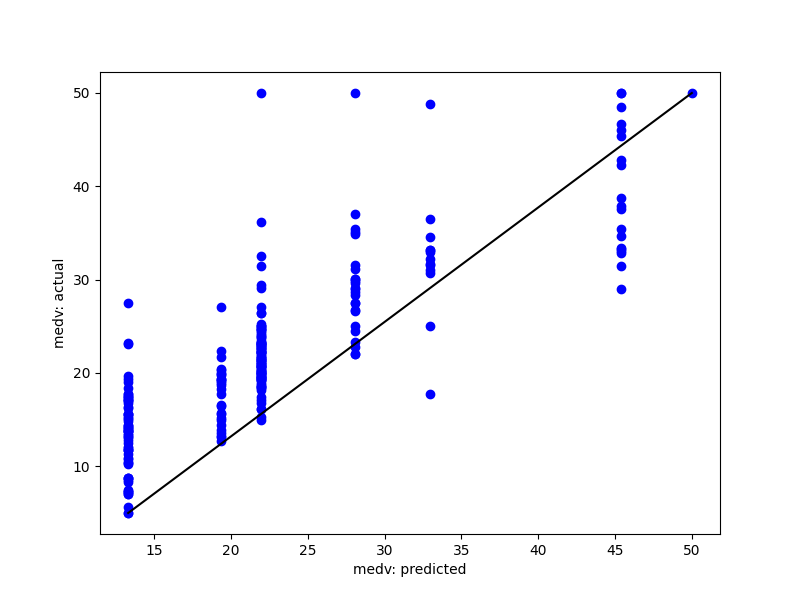

#### Mean Squared Error: 25.995306653886537

In [52]:
display(Markdown('### Pruned tree'))
print_tree(pruned_tree, test_x_df, test_y_df, 'testing')
tree_prediction = pruned_tree.predict(test_x_df)
plot_confusion(test_y_df, tree_prediction, boston_y_labels)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, tree_prediction)}'))

### Initial tree

DecisionTreeRegressor:
Variables actually used in tree construction: ['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat']
Number of terminal nodes: 240

Calculating metrics for "testing" dataset:
Residual mean deviance: 379.38769230769225 = 4932.039999999999 / 13
Distribution of residuals:
 count    253.000000
mean      19.494229
std       41.928792
min        0.000000
25%        1.210000
50%        4.000000
75%       16.810000
max      408.040000
Name: medv, dtype: float64


<IPython.core.display.Javascript object>


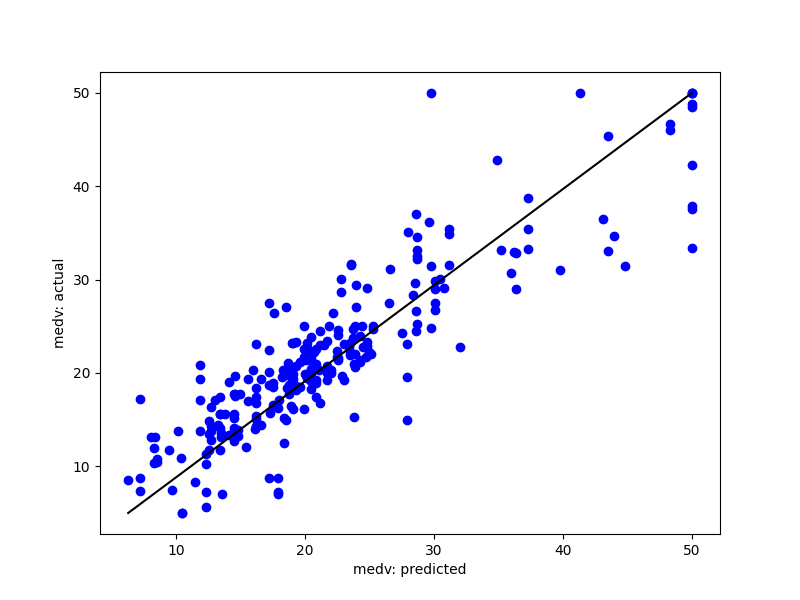

#### Mean Squared Error: 19.494229249011855

In [53]:
display(Markdown('### Initial tree'))
print_tree(tree_boston, test_x_df, test_y_df, 'testing')
tree_prediction = tree_boston.predict(test_x_df)
plot_confusion(test_y_df, tree_prediction, boston_y_labels)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, tree_prediction)}'))

### Interpret the results.

We will be comparing initial tree with the pruned tree. Both trees were trained on the half of the dataset.

The results are not one-sided, as it was classification trees: initial tree is huge (240 nodes), but it has lower MSE (~19.5) while pruned tree is rather small (7 nodes) with slightly higher MSE (~26). Also, the plot of actual vs predicted for the pruned tree looks more like a classification tree chart - many points have the same $x$ (predicted) for different $y$ (actual).

This means that tree pruning also makes sense for regression trees, but it requires more tweaking. For example, charts depicting cross-validation results were somewhat confusing. Also, further experiments could include using trees with higher size limit, if current tree with classification-like regression model is not satisfactory.

Perhaps, trees are much better for classification, than regression. It seems especially true for pruned trees.

## 1.2.4 Learn and assess Regression Bagging (Trees) and Random Forests

### Fit boosted regression trees to the `Boston` data set.

> There are 2 different classes in `sklearn` library: `BaggingRegressor` and `RandomForestRegressor`. Although, `RandomForestRegressor` can be used for bagging (bagging is a subset of random forests), I will use a dedicated class for this purpose.

> The default values for constants are taken from R functions.

In [54]:
forest_default_n_estimators = 500

def fit_bag_regr(x_df, y_df, n_estimators=forest_default_n_estimators, bootstrap=True, **kwargs):
    return BaggingRegressor(random_state=random_state, n_estimators=n_estimators, bootstrap=bootstrap, **kwargs).fit(x_df, y_df)

In [55]:
def print_forest(forest, x_df, y_df, df_type=None):
    print(f'Forest type: {type(forest).__name__}.')
    print(f'Number of trees: {len(forest.estimators_)}')
    print(f'No. of variables tried at each split: {forest.n_features_in_}')
    print()
    if df_type:
        print(f'Calculating metrics for "{df_type}" dataset:')
    prediction = forest.predict(x_df)
    print(f'Mean of squared residuals: {mean_squared_error(y_df, prediction)}')
    print(f'% Var explained: {explained_variance_score(y_df, prediction) * 100}')


In [56]:
reset_random(0)
bag_fit = fit_bag_regr(train_x_df, train_y_df)
print_forest(bag_fit, train_x_df, train_y_df, 'training')

Forest type: BaggingRegressor.
Number of trees: 500
No. of variables tried at each split: 13

Calculating metrics for "training" dataset:
Mean of squared residuals: 2.2838003581027606
% Var explained: 97.39760694364253


### How well does this bagged model perform on the test set?

<IPython.core.display.Javascript object>


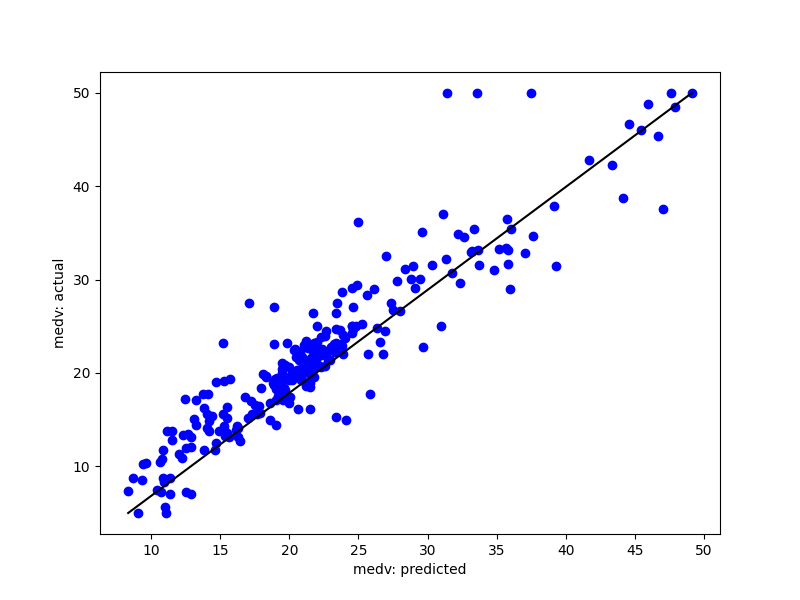

#### Mean Squared Error: 11.222245911462402

In [57]:
prediction = bag_fit.predict(test_x_df)
plot_confusion(test_y_df, prediction, boston_y_labels)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, prediction)}'))

### Change the number of trees grown in the random forest.

In [58]:
reset_random(1715)
bag_fit = fit_bag_regr(train_x_df, train_y_df, n_estimators=25)
print_forest(bag_fit, train_x_df, train_y_df, 'training')
prediction = bag_fit.predict(test_x_df)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, prediction)}'))

Forest type: BaggingRegressor.
Number of trees: 25
No. of variables tried at each split: 13

Calculating metrics for "training" dataset:
Mean of squared residuals: 2.67016246640316
% Var explained: 96.9571788063585


#### Mean Squared Error: 11.372994909090904

### Interpret the results.

First, `% Var explained` has to be explained. Explained variance is a percentage metric (similar to $R^2$), which shows, how well the prediction worked compared to the actual values for given data points.

Explained variance is higher than 96% for both cases, MSE is smaller than 12. I am afraid that the models turned out to be overfit.

As for the "confusion matrix" chart, the values, are not lying on the diagonal, so there still exists a certain error, but most of the values are still very close to the diagonal.

Using 500 trees instead of 25 during bagging show almost negligible improvement in both metrics. So, I believe that 25 trees was a better choice computation-wise.

### Growing a random forest proceeds in exactly the same way, except that we use a smaller value of the $m$.

In [59]:
def fit_forest_regr(x_df, y_df, max_features=None, n_estimators=forest_default_n_estimators, bootstrap=True, **kwargs):
    if max_features is None:
        max_features = x_df.shape[1] // 3
    return RandomForestRegressor(max_features=max_features, random_state=random_state, n_estimators=n_estimators, bootstrap=bootstrap, **kwargs).fit(x_df, y_df)

Here we use `max_features = 6`.

Forest type: RandomForestRegressor.
Number of trees: 500
No. of variables tried at each split: 13

Calculating metrics for "training" dataset:
Mean of squared residuals: 1.9646962660869587
% Var explained: 97.76142586858118


<IPython.core.display.Javascript object>


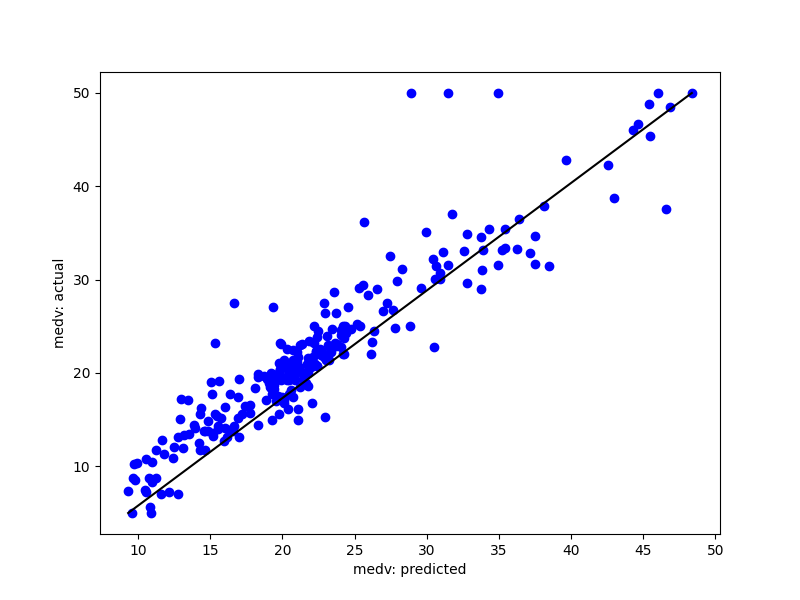

#### Mean Squared Error: 11.315987058972324

In [60]:
reset_random(0)
forest_fit = fit_forest_regr(train_x_df, train_y_df, max_features=6)
print_forest(forest_fit, train_x_df, train_y_df, 'training')
prediction = forest_fit.predict(test_x_df)
plot_confusion(test_y_df, prediction, boston_y_labels)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, prediction)}'))

### Interpret the results.

The results are amazing: MSE is less than 11 and variance explained score is almost 98%! It's even slightly better than with tree bagging.

As for the "confusion matrix" chart, the values, are not lying on the diagonal, so there still exists a certain error, but most of the values are still very close to the diagonal. The points are closer to the diagonal, then on the corresponding chart for tree bagging, which confirms the metrics.

I am still slightly apprehensive of overfitting, but we don't have more data about statistical population, from which dataset was taken.


### Check the importance of each variable.

> I couldn't find a way to get aggregated node purity increase. I understand that it can be calculated from importance, but I don't know how to get the probability of getting to each node.

In [61]:
def importance(model, importance_label='Importance'):
    df = pd.DataFrame({
        'Features': pd.Series(dtype=str),
        importance_label + ', %': pd.Series(dtype=float)
    }, index=pd.Series(dtype=int))
    for i, row in enumerate(zip(model.feature_names_in_, model.feature_importances_ * 100)):
        df.loc[i] =  row
    return df

In [62]:
def plot_barh(df, label_column, value_column, x_label=None):
    fig, ax = plt.subplots(figsize=default_figsize)
    df = df.sort_values(value_column, ascending=False)
    indexes = np.arange(df.shape[0])
    ax.barh(indexes, df[value_column], align='center')
    ax.set_yticks(indexes, labels=df[label_column])
    ax.invert_yaxis()  # labels read top-to-bottom
    if x_label:
        ax.set_xlabel(x_label)
    fig.show()

In [63]:
def display_importance(model, importance_label='Importance'):
    df = importance(model, importance_label)
    display(df)
    plot_barh(df, 'Features', importance_label + ', %', importance_label + ', %')
    return df

,Features,"Importance, %"
0,crim,4.257646
1,zn,0.491679
2,indus,2.382401
3,chas,1.257081
4,nox,4.710915
5,rm,37.979092
6,age,2.773337
7,dis,4.376416
8,rad,0.777345
9,tax,2.924535


<IPython.core.display.Javascript object>


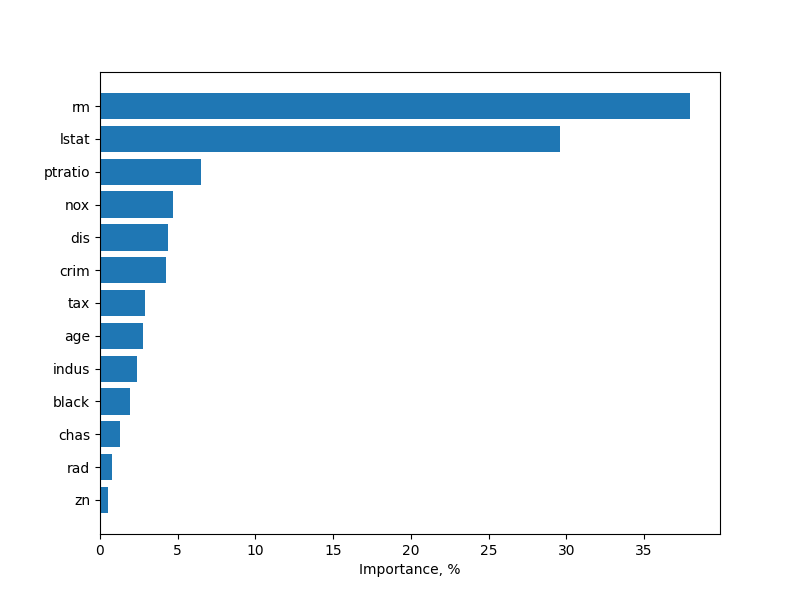

In [64]:
_ = display_importance(forest_fit)

### Interpret the results.

First, impurity-based importance is used. It shows how much model depends on each feature and how much imprecise the model would become if certain features were removed.

Both the table and the chart show that there are 2 super-important features - `rm` and `lstat`. `ptratio` has importance over 5%, while the remaining have importance less than 5% each.

## 1.2.5 Learn and assess Regression Boosting (Trees)

> "gaussian" loss function in R means MSE.

> Also, didn't find `sklearn` equivalent of the default parameter for `bag.fraction` (from [docs](https://www.rdocumentation.org/packages/gbm/versions/1.2/topics/gbm): _the fraction of the training set observations randomly selected to propose the next tree in the expansion. This introduces randomnesses into the model fit. If `bag.fraction`_).

In [65]:
def fit_boost_regr(x_df, y_df, max_depth=1, min_samples_leaf=10, learning_rate=0.001, validation_fraction=0, **kwargs):
    return GradientBoostingRegressor(loss='squared_error', max_depth=max_depth, min_samples_leaf=min_samples_leaf, learning_rate=learning_rate, validation_fraction=validation_fraction, **kwargs).fit(x_df, y_df)

In [66]:
def print_boost(boost):
    print(f'Boosting type: {type(boost).__name__}.')
    print(f'Number of iterations: {len(boost.train_score_)}')
    print(f'Loss function: {type(boost.loss_).__name__}')
    print(f'Features with non-zero influence: {np.count_nonzero(boost.feature_importances_)} out of {len(boost.feature_importances_)}')

Boosting type: GradientBoostingRegressor.
Number of iterations: 5000
Loss function: LeastSquaresError
Features with non-zero influence: 13 out of 13


,Features,"Influence, %"
0,crim,2.042023
1,zn,0.040573
2,indus,0.267171
3,chas,0.303574
4,nox,3.334505
5,rm,56.963736
6,age,1.920793
7,dis,3.104114
8,rad,0.126779
9,tax,0.679912


<IPython.core.display.Javascript object>


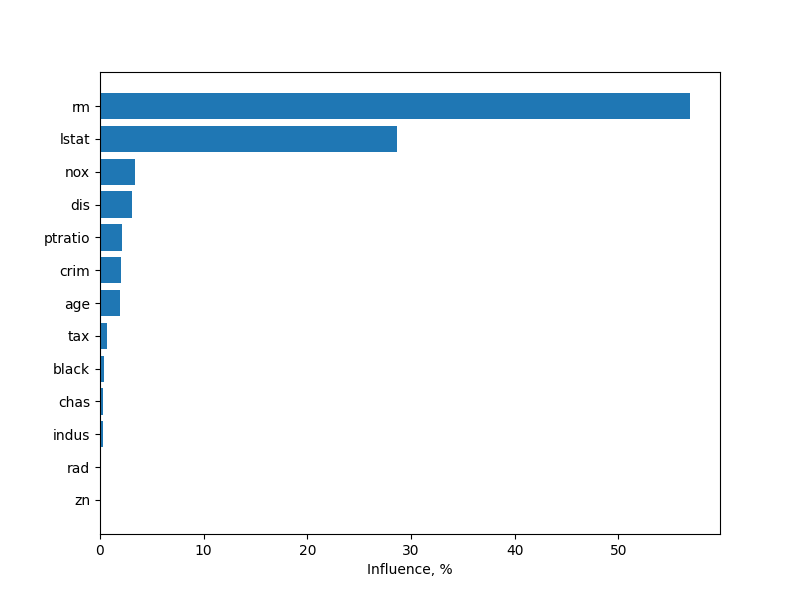

In [67]:
reset_random(1)
boost_fit = fit_boost_regr(train_x_df, train_y_df, max_depth=4, n_estimators=5000)
print_boost(boost_fit)
imp = display_importance(boost_fit, 'Influence')

In [68]:
display(Markdown(f"#### `lstat` and `rm` total influence: {imp.loc[imp['Features'].isin(('rm', 'lstat'))]['Influence, %'].sum()}"))

#### `lstat` and `rm` total influence: 85.64538103395034

# Interpret the results.

Boosted tree has ridiculous metrics: 2 variables (`lstat` and `rm`) are responsible for more than 85% of influence (importance).

I believe such a stark difference is possible due to the fact that in boosting 5000 trees were used, while 500 trees were used in random forest. The most important features were "amplified".

### We now use the boosted model to predict `medv` on the test set.

> I didn't find a way to supply the amount of trees to be used during prediction.

In [69]:
prediction = boost_fit.predict(test_x_df)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, prediction)}'))

#### Mean Squared Error: 11.788172012253785

### Use other tuning parameters, e.g., set the shrinkage parameter $\lambda = 0.2$.

Boosting type: GradientBoostingRegressor.
Number of iterations: 5000
Loss function: LeastSquaresError
Features with non-zero influence: 13 out of 13


,Features,"Influence, %"
0,crim,2.111739
1,zn,0.069201
2,indus,0.338872
3,chas,0.215247
4,nox,3.321659
5,rm,54.086497
6,age,3.196484
7,dis,3.576315
8,rad,0.134142
9,tax,1.591136


<IPython.core.display.Javascript object>


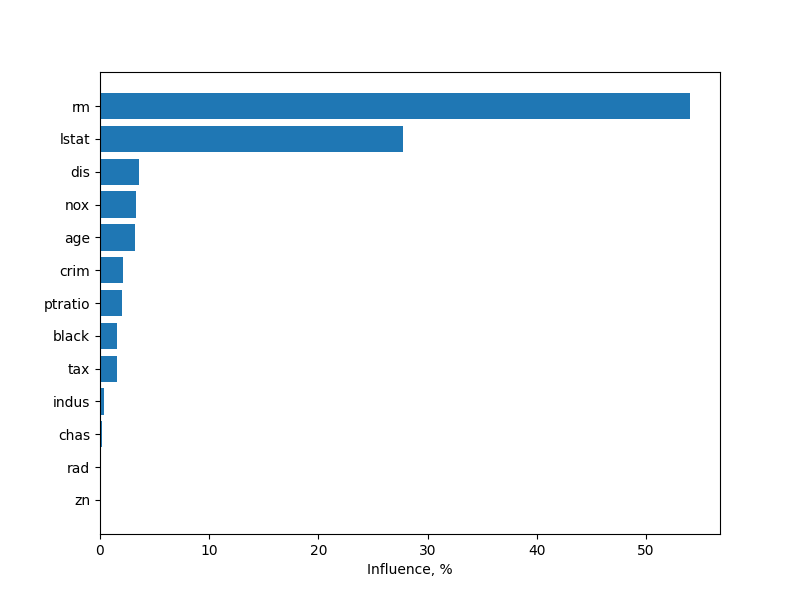

<IPython.core.display.Javascript object>


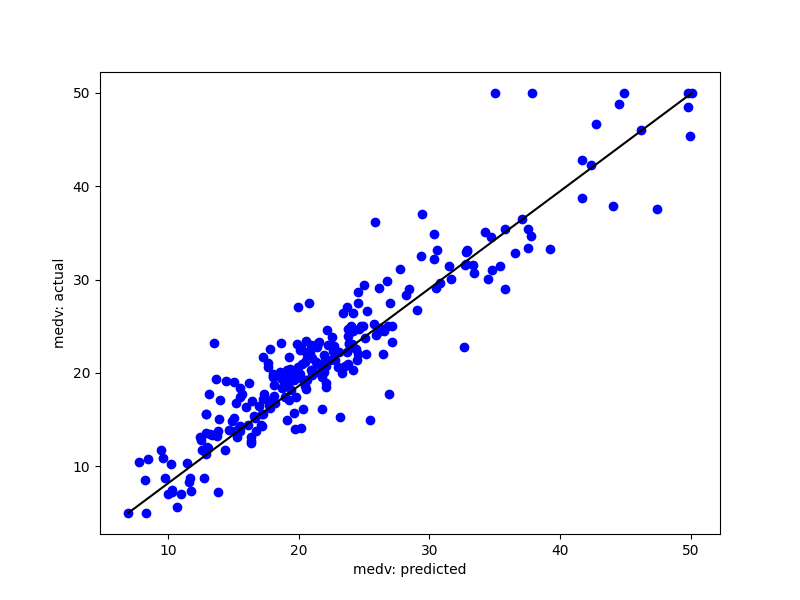

#### Mean Squared Error: 10.438905857411921

In [70]:
boost_fit = fit_boost_regr(train_x_df, train_y_df, max_depth=4, learning_rate=0.2, n_estimators=5000)
print_boost(boost_fit)
imp = display_importance(boost_fit, 'Influence')
prediction = boost_fit.predict(test_x_df)
plot_confusion(test_y_df, prediction, boston_y_labels)
display(Markdown(f'#### Mean Squared Error: {mean_squared_error(test_y_df, prediction)}'))

In [71]:
display(Markdown(f"#### `lstat` and `rm` total influence: {imp.loc[imp['Features'].isin(('rm', 'lstat'))]['Influence, %'].sum()}"))

#### `lstat` and `rm` total influence: 81.85801168620492

### Interpret the result.

Usage of a larger learning rate allowed to slightly decrease the disparity between `rm` with `lstat` and remaining variables: now the two of them combined influence is 81.85%.

MSE on testing data is also slightly decreased: from 11.8 to 10.4.

The "confusion matrix" chart looks very similar to random forest with 6 features for each estimator (see above for details).

All in all, boosting is another viable option for improving overall performance of tree-based models.

# P.S.

It seems the implementation of tree-related models in `sklearn` is better than in R, because the metrics show at least 10% accuracy and explained variance increase and much smaller MSE.

I double-checked that I used correct formulas for metrics as well as parameters same to R implementation. The models didn't seem to be overfit because cross-validation was used and, in general, training data was not used for testing.